# Dry Beans Classification

ToDO

1- stratify data in split to solve imbalanced labels

2- feature importance as many features are correlated

3- transform distribution into normal

4- PCA

5- Oversampling & Undersampling

6- Hyperparameter Tuning

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Read data

In [2]:
dataset_path = '/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/'

train_df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))

test_df = pd.read_csv(os.path.join(dataset_path, 'test.csv'))

# EDA

In [3]:
train_df.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [5]:
train_df.iloc[:,1:].describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


In [6]:
train_df['y'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

In [7]:
train_df['y'] = train_df['y'].map({'DERMASON': 0, 'SIRA': 1, 'SEKER': 2, 'HOROZ': 3, 'CALI': 4,\
                                   'BARBUNYA': 5, 'BOMBAY': 6})

train_df['y'] = train_df['y'].astype('int') 
train_df['y'].value_counts()

0    2837
1    2109
2    1621
3    1488
4    1304
5    1057
6     418
Name: y, dtype: int64

In [8]:
# #distributions of the data
# for i in train_df.drop('ID', axis=1):
#     sns.displot(train_df[i])
#     plt.show()

In [9]:
train_df.columns

Index(['ID', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y'],
      dtype='object')

In [10]:
#sns.pairplot(train_df,vars=train_df.drop(['ID'], axis=1).columns, palette='husl',plot_kws={'alpha': 0.5})

# There are many features highly correlated with each other , confirm this with corr matrix and remove one of the correlated features to rempve redundancy & overfitting

In [11]:
# sns.boxplot(x='Area', data=train_df)

<AxesSubplot:>

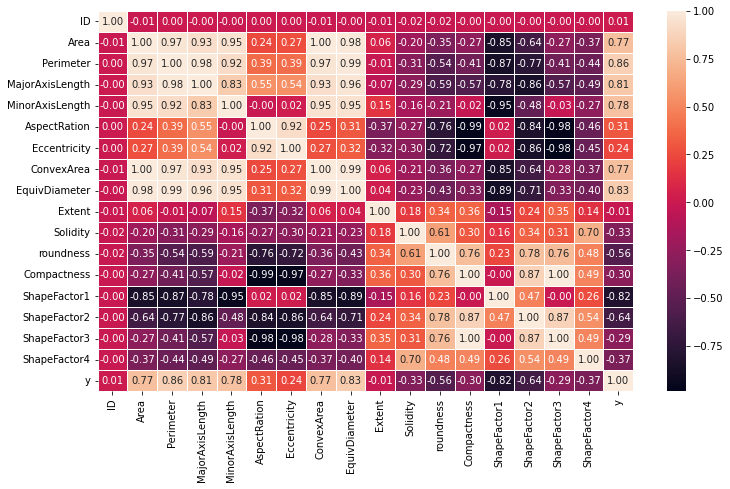

In [12]:
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(train_df.corr(), linewidths=.5, annot=True, fmt='.2f', ax=ax)

#### Area highly correlated with Periemeter & MajorAxisLength & MinorAxisLength & EquivDiameter
#### AspectRation highly correlated with Compactness & ShapeFactor3
### Drop Periemeter & MajorAxisLength & MinorAxisLength & EquivDiameter & Compactness & ShapeFactor3

# Features & labels

In [13]:
#features = train_df.drop(["ID", "y", "Perimeter", "MajorAxisLength", "MinorAxisLength", "EquivDiameter",\
#                         "Compactness", "ShapeFactor3"], axis=1)
features = train_df.drop(["ID", "y", "Perimeter", "ConvexArea", "ShapeFactor3", "EquivDiameter",
                          "MajorAxisLength", "MinorAxisLength", "ShapeFactor2"],axis=1)

labels = train_df["y"].astype('category')

my_test_df = test_df.drop(["ID", "Perimeter", "ConvexArea", "ShapeFactor3", "EquivDiameter",
                          "MajorAxisLength", "MinorAxisLength", "ShapeFactor2"],axis=1)

In [14]:
features.head()

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor4
0,58238,2.124697,0.882317,0.604756,0.987470,0.775723,0.685561,0.006820,0.998595
1,44515,1.241266,0.592420,0.771745,0.994082,0.974620,0.896387,0.005966,0.997370
2,31662,1.424417,0.712136,0.801407,0.988387,0.930853,0.836931,0.007577,0.997737
3,38778,1.458456,0.727925,0.766137,0.989033,0.904439,0.827733,0.006923,0.999250
4,42530,1.455275,0.726511,0.729816,0.988426,0.888895,0.827499,0.006612,0.996507


# Show distribution each feature with respect to each label

In [15]:
my_df = features.copy()
my_df['y'] = train_df['y']
my_df.head()

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor4,y
0,58238,2.124697,0.882317,0.604756,0.987470,0.775723,0.685561,0.006820,0.998595,3
1,44515,1.241266,0.592420,0.771745,0.994082,0.974620,0.896387,0.005966,0.997370,2
2,31662,1.424417,0.712136,0.801407,0.988387,0.930853,0.836931,0.007577,0.997737,0
3,38778,1.458456,0.727925,0.766137,0.989033,0.904439,0.827733,0.006923,0.999250,0
4,42530,1.455275,0.726511,0.729816,0.988426,0.888895,0.827499,0.006612,0.996507,1


In [16]:
# for i in range(7):
#     sns.displot(my_df[my_df['y'] == i].Area)
#     plt.title('y ={}'.format(i))

In [17]:
for i in range(7):
    print(i)
    print(my_df[my_df['y'] == i].Area.describe())

0
count     2837.000000
mean     32197.808601
std       4676.539286
min      20420.000000
25%      28654.000000
50%      31966.000000
75%      35660.000000
max      42159.000000
Name: Area, dtype: float64
1
count     2109.000000
mean     44712.792793
std       4565.500512
min      31519.000000
25%      41565.000000
50%      44591.000000
75%      47767.000000
max      63612.000000
Name: Area, dtype: float64
2
count     1621.000000
mean     39966.113510
std       4856.696876
min      28395.000000
25%      36463.000000
50%      39202.000000
75%      42749.000000
max      61150.000000
Name: Area, dtype: float64
3
count     1488.000000
mean     53621.056452
std       7331.434249
min      33263.000000
25%      48882.250000
50%      53777.000000
75%      58421.250000
max      81929.000000
Name: Area, dtype: float64
4
count      1304.000000
mean      75440.769939
std        9444.316811
min       45504.000000
25%       69089.250000
50%       74641.500000
75%       81403.000000
max      116272.0

## It is clear that:
### y = 0 => Area 28000:35000
### y = 1 => Area 41000:47000
### y = 2 => Area 36000:42000
### y = 3 => Area 33000:58000
### y = 4 => Area 69000:81000
### y = 5 => Area 62000:76000
### y = 6 => Area 157000:187000

# Bining Area

In [18]:
bins = [0,28000, 35000, 42000, 47000, 58000, 62000, 69000, 76000, 81000, 157000,187000]
# Use .cut() method to make bins from the Area column

categorized_area = pd.cut(my_df['Area'], bins)
my_df['area_cat'] = categorized_area
my_df = my_df.drop(["Area"], axis=1)
my_df

categorized_area = pd.cut(my_test_df['Area'], bins)
my_test_df['area_cat'] = categorized_area
my_test_df = my_test_df.drop(["Area"], axis=1)

In [19]:
def bin_col(df, col, bins):
    # Use .cut() method to make bins from the Area column
    categorized = pd.cut(df[col], bins)
    df[col] = categorized
    return df 

In [20]:
for i in range(7):
    print(i)
    print(my_df[my_df['y'] == i]['AspectRation'].describe())

0
count    2837.000000
mean        1.490935
std         0.096173
min         1.190922
25%         1.426308
50%         1.484028
75%         1.551294
max         1.965673
Name: AspectRation, dtype: float64
1
count    2109.000000
mean        1.569822
std         0.095906
min         1.259251
25%         1.504058
50%         1.561117
75%         1.628937
max         2.006989
Name: AspectRation, dtype: float64
2
count    1621.000000
mean        1.246667
std         0.082991
min         1.024868
25%         1.192692
50%         1.237435
75%         1.289020
max         1.679979
Name: AspectRation, dtype: float64
3
count    1488.000000
mean        2.024993
std         0.136411
min         1.462019
25%         1.945729
50%         2.031860
75%         2.115267
max         2.388873
Name: AspectRation, dtype: float64
4
count    1304.000000
mean        1.732528
std         0.091205
min         1.297228
25%         1.675483
50%         1.732188
75%         1.793295
max         2.008074
Name: Aspe

In [21]:
bins = [0, 1.1, 1.2, 1.4, 1.5, 1.6, 1.7, 1.9, 2.1,5]
bin_col(my_df, 'AspectRation', bins)

bin_col(my_test_df, 'AspectRation', bins)


,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor4,area_cat
0,"(1.9, 2.1]",0.861896,0.620790,0.957982,0.793735,0.698760,0.006725,0.962889,"(47000, 58000]"
1,"(1.4, 1.5]",0.719993,0.767458,0.987812,0.909913,0.832204,0.007994,0.997956,"(28000, 35000]"
2,"(1.2, 1.4]",0.680198,0.753013,0.978857,0.827860,0.854288,0.005649,0.995607,"(47000, 58000]"
3,"(1.4, 1.5]",0.723831,0.716508,0.988297,0.932871,0.830066,0.008627,0.998596,"(0, 28000]"
4,"(1.5, 1.6]",0.750492,0.804617,0.987263,0.868240,0.809606,0.003701,0.991803,"(81000, 157000]"
...,...,...,...,...,...,...,...,...,...
2704,"(1.7, 1.9]",0.844640,0.759604,0.985927,0.809876,0.728550,0.005991,0.991504,"(62000, 69000]"
2705,"(1.2, 1.4]",0.567264,0.767479,0.991980,0.969089,0.906546,0.006179,0.997923,"(35000, 42000]"
2706,"(1.9, 2.1]",0.872611,0.611648,0.958138,0.756657,0.683944,0.006668,0.957748,"(58000, 62000]"
2707,"(1.4, 1.5]",0.744255,0.724890,0.986004,0.880956,0.816130,0.007472,0.997263,"(28000, 35000]"


In [22]:
for i in range(7):
    print(i)
    print(my_df[my_df['y'] == i]['Eccentricity'].describe())

0
count    2837.000000
mean        0.736859
std         0.040038
min         0.543073
25%         0.713052
50%         0.738876
75%         0.764500
max         0.860925
Name: Eccentricity, dtype: float64
1
count    2109.000000
mean        0.767235
std         0.032584
min         0.607757
25%         0.746961
50%         0.767902
75%         0.789386
max         0.867028
Name: Eccentricity, dtype: float64
2
count    1621.000000
mean        0.585945
std         0.071724
min         0.218951
25%         0.544995
50%         0.589013
75%         0.630999
max         0.803544
Name: Eccentricity, dtype: float64
3
count    1488.000000
mean        0.867238
std         0.021386
min         0.729496
25%         0.857822
50%         0.870505
75%         0.881195
max         0.908167
Name: Eccentricity, dtype: float64
4
count    1304.000000
mean        0.814531
std         0.023004
min         0.636987
25%         0.802358
50%         0.816529
75%         0.830088
max         0.867183
Name: Ecce

In [23]:
bins = [0, 0.5, 0.6, 0.7, 0.8, 0.85, 0.88, 10]
bin_col(my_df, 'Eccentricity', bins)

bin_col(my_test_df, 'Eccentricity', bins)


,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor4,area_cat
0,"(1.9, 2.1]","(0.85, 0.88]",0.620790,0.957982,0.793735,0.698760,0.006725,0.962889,"(47000, 58000]"
1,"(1.4, 1.5]","(0.7, 0.8]",0.767458,0.987812,0.909913,0.832204,0.007994,0.997956,"(28000, 35000]"
2,"(1.2, 1.4]","(0.6, 0.7]",0.753013,0.978857,0.827860,0.854288,0.005649,0.995607,"(47000, 58000]"
3,"(1.4, 1.5]","(0.7, 0.8]",0.716508,0.988297,0.932871,0.830066,0.008627,0.998596,"(0, 28000]"
4,"(1.5, 1.6]","(0.7, 0.8]",0.804617,0.987263,0.868240,0.809606,0.003701,0.991803,"(81000, 157000]"
...,...,...,...,...,...,...,...,...,...
2704,"(1.7, 1.9]","(0.8, 0.85]",0.759604,0.985927,0.809876,0.728550,0.005991,0.991504,"(62000, 69000]"
2705,"(1.2, 1.4]","(0.5, 0.6]",0.767479,0.991980,0.969089,0.906546,0.006179,0.997923,"(35000, 42000]"
2706,"(1.9, 2.1]","(0.85, 0.88]",0.611648,0.958138,0.756657,0.683944,0.006668,0.957748,"(58000, 62000]"
2707,"(1.4, 1.5]","(0.7, 0.8]",0.724890,0.986004,0.880956,0.816130,0.007472,0.997263,"(28000, 35000]"


In [24]:
for i in range(7):
    print(i)
    print(my_df[my_df['y'] == i]['Compactness'].describe())

0
count    2837.000000
mean        0.818983
std         0.026283
min         0.711975
25%         0.801688
50%         0.819599
75%         0.836137
max         0.915760
Name: Compactness, dtype: float64
1
count    2109.000000
mean        0.797405
std         0.024361
min         0.704454
25%         0.781593
50%         0.798559
75%         0.813679
max         0.889525
Name: Compactness, dtype: float64
2
count    1621.000000
mean        0.896320
std         0.028938
min         0.770126
25%         0.879948
50%         0.898221
75%         0.914875
max         0.987303
Name: Compactness, dtype: float64
3
count    1488.000000
mean        0.701112
std         0.023915
min         0.645368
25%         0.685402
50%         0.698623
75%         0.714001
max         0.825812
Name: Compactness, dtype: float64
4
count    1304.000000
mean        0.756959
std         0.020598
min         0.701215
25%         0.743059
50%         0.755899
75%         0.769182
max         0.877273
Name: Compactn

In [25]:
bins = [0, 0.6, 0.7, 0.8, 0.83, 0.91, 10]
bin_col(my_df, 'Compactness', bins)

bin_col(my_test_df, 'Compactness', bins)


,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor4,area_cat
0,"(1.9, 2.1]","(0.85, 0.88]",0.620790,0.957982,0.793735,"(0.6, 0.7]",0.006725,0.962889,"(47000, 58000]"
1,"(1.4, 1.5]","(0.7, 0.8]",0.767458,0.987812,0.909913,"(0.83, 0.91]",0.007994,0.997956,"(28000, 35000]"
2,"(1.2, 1.4]","(0.6, 0.7]",0.753013,0.978857,0.827860,"(0.83, 0.91]",0.005649,0.995607,"(47000, 58000]"
3,"(1.4, 1.5]","(0.7, 0.8]",0.716508,0.988297,0.932871,"(0.83, 0.91]",0.008627,0.998596,"(0, 28000]"
4,"(1.5, 1.6]","(0.7, 0.8]",0.804617,0.987263,0.868240,"(0.8, 0.83]",0.003701,0.991803,"(81000, 157000]"
...,...,...,...,...,...,...,...,...,...
2704,"(1.7, 1.9]","(0.8, 0.85]",0.759604,0.985927,0.809876,"(0.7, 0.8]",0.005991,0.991504,"(62000, 69000]"
2705,"(1.2, 1.4]","(0.5, 0.6]",0.767479,0.991980,0.969089,"(0.83, 0.91]",0.006179,0.997923,"(35000, 42000]"
2706,"(1.9, 2.1]","(0.85, 0.88]",0.611648,0.958138,0.756657,"(0.6, 0.7]",0.006668,0.957748,"(58000, 62000]"
2707,"(1.4, 1.5]","(0.7, 0.8]",0.724890,0.986004,0.880956,"(0.8, 0.83]",0.007472,0.997263,"(28000, 35000]"


# one hot encoding

In [26]:
onehot_area = pd.get_dummies(my_df[['area_cat']])

# Use pandas method .drop() to remove the old columns and method .concat() to add the new columns
my_df = pd.concat([my_df, onehot_area], axis=1)

# drop columns
my_df.drop(['area_cat'], axis=1, inplace=True)

#AspectRation
onehot_aspectration = pd.get_dummies(my_df[['AspectRation']])

# Use pandas method .drop() to remove the old columns and method .concat() to add the new columns
my_df = pd.concat([my_df, onehot_aspectration], axis=1)

# drop columns
my_df.drop(['AspectRation'], axis=1, inplace=True)

#Eccentricity
onehot_eccentricity = pd.get_dummies(my_df[['Eccentricity']])

# Use pandas method .drop() to remove the old columns and method .concat() to add the new columns
my_df = pd.concat([my_df, onehot_eccentricity], axis=1)

# drop columns
my_df.drop(['Eccentricity'], axis=1, inplace=True)

#Compactness
onehot_compactness = pd.get_dummies(my_df[['Compactness']])

# Use pandas method .drop() to remove the old columns and method .concat() to add the new columns
my_df = pd.concat([my_df, onehot_compactness], axis=1)

# drop columns
my_df.drop(['Compactness'], axis=1, inplace=True)

my_df.head()

#################################

onehot_area = pd.get_dummies(my_test_df[['area_cat']])

# Use pandas method .drop() to remove the old columns and method .concat() to add the new columns
my_test_df = pd.concat([my_test_df, onehot_area], axis=1)

# drop columns
my_test_df.drop(['area_cat'], axis=1, inplace=True)

#AspectRation
onehot_aspectration = pd.get_dummies(my_test_df[['AspectRation']])

# Use pandas method .drop() to remove the old columns and method .concat() to add the new columns
my_test_df = pd.concat([my_test_df, onehot_aspectration], axis=1)

# drop columns
my_test_df.drop(['AspectRation'], axis=1, inplace=True)

#Eccentricity
onehot_eccentricity = pd.get_dummies(my_test_df[['Eccentricity']])

# Use pandas method .drop() to remove the old columns and method .concat() to add the new columns
my_test_df = pd.concat([my_test_df, onehot_eccentricity], axis=1)

# drop columns
my_test_df.drop(['Eccentricity'], axis=1, inplace=True)

#Compactness
onehot_compactness = pd.get_dummies(my_test_df[['Compactness']])

# Use pandas method .drop() to remove the old columns and method .concat() to add the new columns
my_test_df = pd.concat([my_test_df, onehot_compactness], axis=1)

# drop columns
my_test_df.drop(['Compactness'], axis=1, inplace=True)

my_test_df.head()



,Extent,Solidity,roundness,ShapeFactor1,ShapeFactor4,"area_cat_(0, 28000]","area_cat_(28000, 35000]","area_cat_(35000, 42000]","area_cat_(42000, 47000]","area_cat_(47000, 58000]",...,"Eccentricity_(0.7, 0.8]","Eccentricity_(0.8, 0.85]","Eccentricity_(0.85, 0.88]","Eccentricity_(0.88, 10.0]","Compactness_(0.0, 0.6]","Compactness_(0.6, 0.7]","Compactness_(0.7, 0.8]","Compactness_(0.8, 0.83]","Compactness_(0.83, 0.91]","Compactness_(0.91, 10.0]"
0,0.620790,0.957982,0.793735,0.006725,0.962889,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,0.767458,0.987812,0.909913,0.007994,0.997956,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0.753013,0.978857,0.827860,0.005649,0.995607,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0.716508,0.988297,0.932871,0.008627,0.998596,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0.804617,0.987263,0.868240,0.003701,0.991803,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [27]:
my_df.columns

Index(['Extent', 'Solidity', 'roundness', 'ShapeFactor1', 'ShapeFactor4', 'y',
       'area_cat_(0, 28000]', 'area_cat_(28000, 35000]',
       'area_cat_(35000, 42000]', 'area_cat_(42000, 47000]',
       'area_cat_(47000, 58000]', 'area_cat_(58000, 62000]',
       'area_cat_(62000, 69000]', 'area_cat_(69000, 76000]',
       'area_cat_(76000, 81000]', 'area_cat_(81000, 157000]',
       'area_cat_(157000, 187000]', 'AspectRation_(0.0, 1.1]',
       'AspectRation_(1.1, 1.2]', 'AspectRation_(1.2, 1.4]',
       'AspectRation_(1.4, 1.5]', 'AspectRation_(1.5, 1.6]',
       'AspectRation_(1.6, 1.7]', 'AspectRation_(1.7, 1.9]',
       'AspectRation_(1.9, 2.1]', 'AspectRation_(2.1, 5.0]',
       'Eccentricity_(0.0, 0.5]', 'Eccentricity_(0.5, 0.6]',
       'Eccentricity_(0.6, 0.7]', 'Eccentricity_(0.7, 0.8]',
       'Eccentricity_(0.8, 0.85]', 'Eccentricity_(0.85, 0.88]',
       'Eccentricity_(0.88, 10.0]', 'Compactness_(0.0, 0.6]',
       'Compactness_(0.6, 0.7]', 'Compactness_(0.7, 0.8]',
     

In [28]:
# # import modules
# import numpy as np
# from scipy import stats

# train_data_boxcox = pd.DataFrame()
# for col in features.columns:
#     train_data_boxcox[col], fitted_lambda = stats.boxcox(features[col])
#     # visualize distribution
#     fig, ax = plt.subplots(1, 2)
#     sns.distplot(train_data_boxcox[col], ax=ax[0])
#     sns.distplot(features[col], ax=ax[1])
#     plt.show()
    
# #show data after normalization with boxcox method    
# print(train_data_boxcox.head())

# Standard Scaling

In [29]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# features = scaler.fit_transform(features)

In [30]:
labels = my_df['y']
features = my_df.drop(['y'], axis=1)

In [31]:
features.columns

Index(['Extent', 'Solidity', 'roundness', 'ShapeFactor1', 'ShapeFactor4',
       'area_cat_(0, 28000]', 'area_cat_(28000, 35000]',
       'area_cat_(35000, 42000]', 'area_cat_(42000, 47000]',
       'area_cat_(47000, 58000]', 'area_cat_(58000, 62000]',
       'area_cat_(62000, 69000]', 'area_cat_(69000, 76000]',
       'area_cat_(76000, 81000]', 'area_cat_(81000, 157000]',
       'area_cat_(157000, 187000]', 'AspectRation_(0.0, 1.1]',
       'AspectRation_(1.1, 1.2]', 'AspectRation_(1.2, 1.4]',
       'AspectRation_(1.4, 1.5]', 'AspectRation_(1.5, 1.6]',
       'AspectRation_(1.6, 1.7]', 'AspectRation_(1.7, 1.9]',
       'AspectRation_(1.9, 2.1]', 'AspectRation_(2.1, 5.0]',
       'Eccentricity_(0.0, 0.5]', 'Eccentricity_(0.5, 0.6]',
       'Eccentricity_(0.6, 0.7]', 'Eccentricity_(0.7, 0.8]',
       'Eccentricity_(0.8, 0.85]', 'Eccentricity_(0.85, 0.88]',
       'Eccentricity_(0.88, 10.0]', 'Compactness_(0.0, 0.6]',
       'Compactness_(0.6, 0.7]', 'Compactness_(0.7, 0.8]',
       'Co

In [32]:
features.rename(columns= { 'area_cat_(0, 28000]' : 'area_1',
                          'area_cat_(28000, 35000]': 'area_2',
                          'area_cat_(35000, 42000]': 'area_3',
                          'area_cat_(42000, 47000]': 'area_4',
                          'area_cat_(47000, 58000]': 'area_5',
                          'area_cat_(58000, 62000]': 'area_6',
                          'area_cat_(62000, 69000]': 'area_7',
                          'area_cat_(69000, 76000]': 'area_8',
                          'area_cat_(76000, 81000]': 'area_9',
                          'area_cat_(81000, 157000]': 'area_10',
                          'area_cat_(157000, 187000]': 'area_11',
                          'AspectRation_(0.0, 1.1]': 'aspect_1',
                          'AspectRation_(1.1, 1.2]': 'aspect_2',
                          'AspectRation_(1.2, 1.4]': 'aspect_3',
                          'AspectRation_(1.4, 1.5]': 'aspect_4',
                          'AspectRation_(1.5, 1.6]': 'aspect_5',
                          'AspectRation_(1.6, 1.7]': 'aspect_6',
                          'AspectRation_(1.7, 1.9]': 'aspect_7',
                          'AspectRation_(1.9, 2.1]': 'aspect_8',
                          'AspectRation_(2.1, 5.0]': 'aspect_9',
                          'Eccentricity_(0.0, 0.5]': 'eccentricity_1',
                          'Eccentricity_(0.5, 0.6]': 'eccentricity_2',
                          'Eccentricity_(0.6, 0.7]': 'eccentricity_3',
                          'Eccentricity_(0.7, 0.8]': 'eccentricity_4',
                          'Eccentricity_(0.8, 0.85]': 'eccentricity_5',
                          'Eccentricity_(0.85, 0.88]': 'eccentricity_6',
                          'Eccentricity_(0.88, 10.0]': 'eccentricity_7',
                          'Compactness_(0.0, 0.6]': 'compactness_1',
                          'Compactness_(0.6, 0.7]': 'compactness_2',
                          'Compactness_(0.7, 0.8]': 'compactness_3',
                          'Compactness_(0.8, 0.83]': 'compactness_4',
                          'Compactness_(0.83, 0.91]': 'compactness_5',
                          'Compactness_(0.91, 10.0]': 'compactness_6',
                         }, inplace=True)
features.columns

my_test_df.rename(columns= { 'area_cat_(0, 28000]' : 'area_1',
                          'area_cat_(28000, 35000]': 'area_2',
                          'area_cat_(35000, 42000]': 'area_3',
                          'area_cat_(42000, 47000]': 'area_4',
                          'area_cat_(47000, 58000]': 'area_5',
                          'area_cat_(58000, 62000]': 'area_6',
                          'area_cat_(62000, 69000]': 'area_7',
                          'area_cat_(69000, 76000]': 'area_8',
                          'area_cat_(76000, 81000]': 'area_9',
                          'area_cat_(81000, 157000]': 'area_10',
                          'area_cat_(157000, 187000]': 'area_11',
                          'AspectRation_(0.0, 1.1]': 'aspect_1',
                          'AspectRation_(1.1, 1.2]': 'aspect_2',
                          'AspectRation_(1.2, 1.4]': 'aspect_3',
                          'AspectRation_(1.4, 1.5]': 'aspect_4',
                          'AspectRation_(1.5, 1.6]': 'aspect_5',
                          'AspectRation_(1.6, 1.7]': 'aspect_6',
                          'AspectRation_(1.7, 1.9]': 'aspect_7',
                          'AspectRation_(1.9, 2.1]': 'aspect_8',
                          'AspectRation_(2.1, 5.0]': 'aspect_9',
                          'Eccentricity_(0.0, 0.5]': 'eccentricity_1',
                          'Eccentricity_(0.5, 0.6]': 'eccentricity_2',
                          'Eccentricity_(0.6, 0.7]': 'eccentricity_3',
                          'Eccentricity_(0.7, 0.8]': 'eccentricity_4',
                          'Eccentricity_(0.8, 0.85]': 'eccentricity_5',
                          'Eccentricity_(0.85, 0.88]': 'eccentricity_6',
                          'Eccentricity_(0.88, 10.0]': 'eccentricity_7',
                          'Compactness_(0.0, 0.6]': 'compactness_1',
                          'Compactness_(0.6, 0.7]': 'compactness_2',
                          'Compactness_(0.7, 0.8]': 'compactness_3',
                          'Compactness_(0.8, 0.83]': 'compactness_4',
                          'Compactness_(0.83, 0.91]': 'compactness_5',
                          'Compactness_(0.91, 10.0]': 'compactness_6',
                         }, inplace=True)
my_test_df.columns

Index(['Extent', 'Solidity', 'roundness', 'ShapeFactor1', 'ShapeFactor4',
       'area_1', 'area_2', 'area_3', 'area_4', 'area_5', 'area_6', 'area_7',
       'area_8', 'area_9', 'area_10', 'area_11', 'aspect_1', 'aspect_2',
       'aspect_3', 'aspect_4', 'aspect_5', 'aspect_6', 'aspect_7', 'aspect_8',
       'aspect_9', 'eccentricity_1', 'eccentricity_2', 'eccentricity_3',
       'eccentricity_4', 'eccentricity_5', 'eccentricity_6', 'eccentricity_7',
       'compactness_1', 'compactness_2', 'compactness_3', 'compactness_4',
       'compactness_5', 'compactness_6'],
      dtype='object')

<AxesSubplot:>

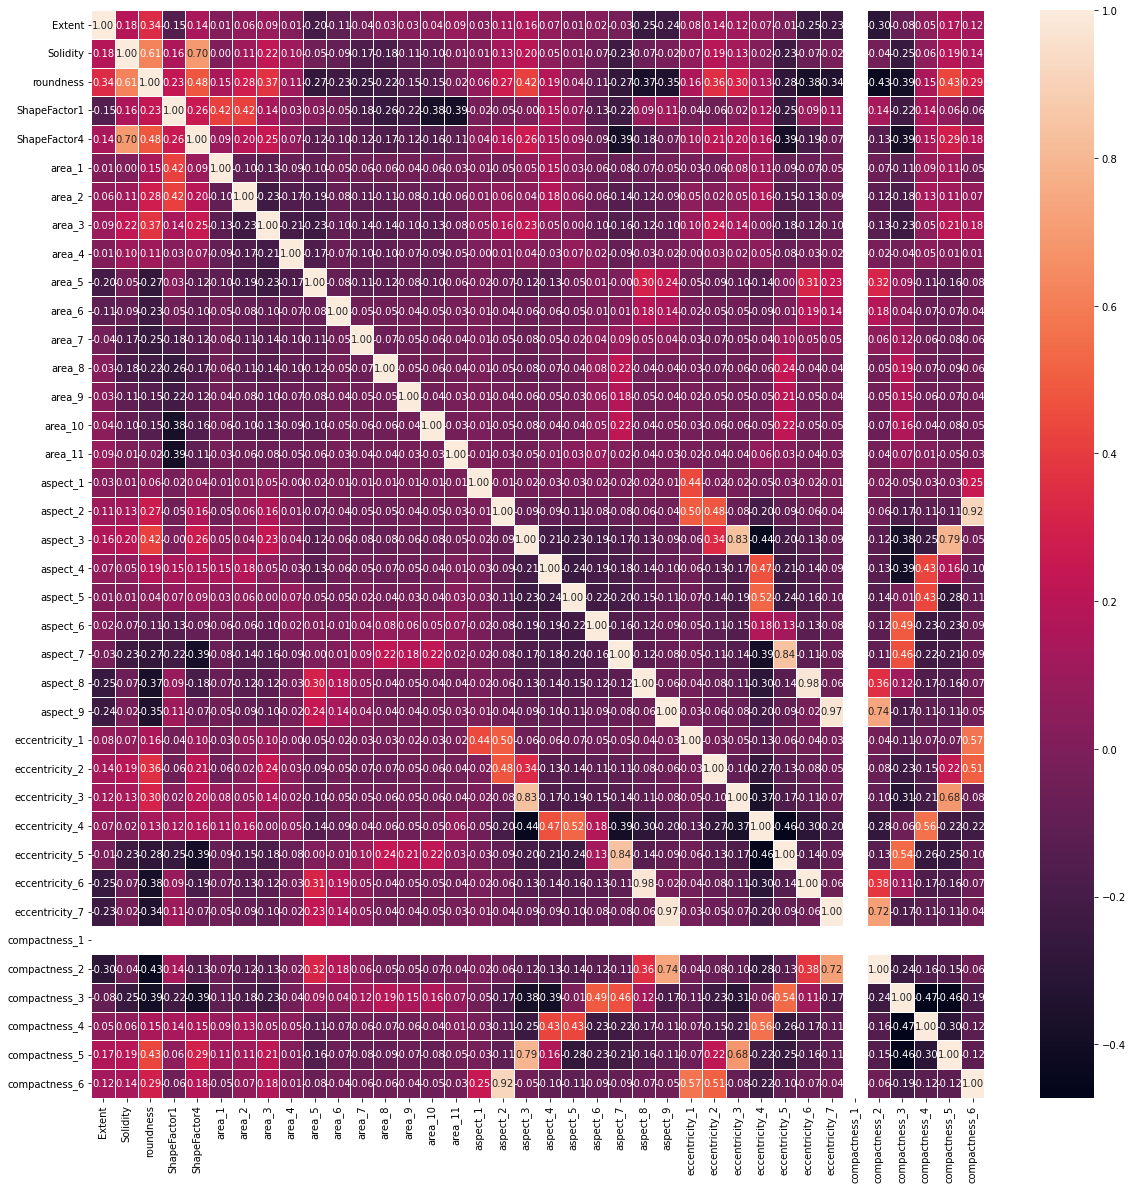

In [33]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(features.corr(), linewidths=.5, annot=True, fmt='.2f', ax=ax)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_vald, y_train, y_vald = train_test_split(features, labels, test_size=0.2, random_state=100, stratify=labels )

# Training Different models

In [35]:
# Decisin Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier().fit(X_train, y_train)
#SVM
from sklearn.svm import SVC
svm_model = SVC(gamma='auto').fit(X_train, y_train)
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier().fit(X_train, y_train)
#Ada Boosting
from sklearn.ensemble import AdaBoostClassifier
ab_model = AdaBoostClassifier().fit(X_train, y_train)
# XG Boosting
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=500)
xgb_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_vald, y_vald)],
             verbose=False)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:43:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Evaluating Models

In [36]:
# print accuracy of each model on validation data
print("Scores of the models")
print("Decision tree:", dt_model.score(X_vald, y_vald))
print("SVM:", svm_model.score(X_vald, y_vald))
print("Random forest:", rf_model.score(X_vald, y_vald))
print("Gradient boosting:", gb_model.score(X_vald, y_vald))
print("AdaBoost:", ab_model.score(X_vald, y_vald))
print("XGBoost:", xgb_model.score(X_vald, y_vald))

Scores of the models
Decision tree: 0.8790955237655745
SVM: 0.8315643747115828
Random forest: 0.9146285186894324
Gradient boosting: 0.9206275957544993
AdaBoost: 0.8020304568527918
XGBoost: 0.9215505306875865


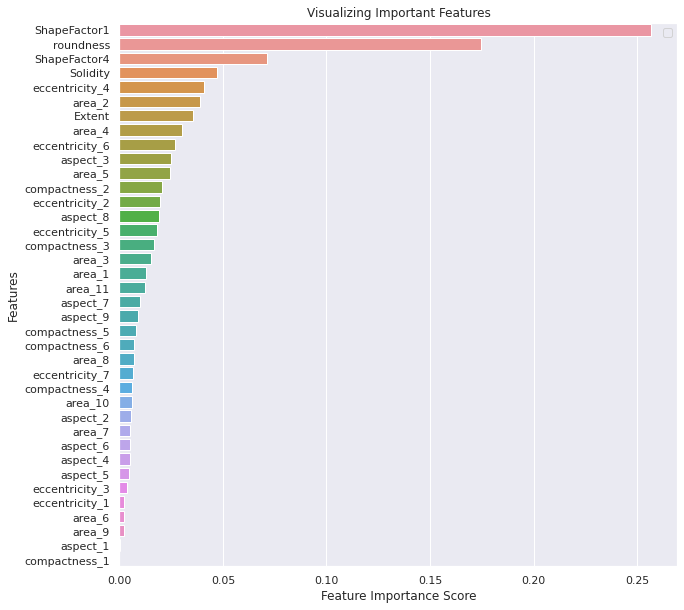

In [37]:
feature_imp = pd.Series(rf_model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

# Creating a bar plot
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# XGBoost

In [38]:
features = features.drop(['aspect_1', 'area_9', 'aspect_2', 'eccentricity_6', 'eccentricity_7'],axis=1)

X_train, X_vald, y_train, y_vald = train_test_split(features, labels, test_size=0.2,
                                                    random_state=100, stratify=labels )

# XG Boosting
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=500)
xgb_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_vald, y_vald)],
             verbose=False)

print("XGBoost:", xgb_model.score(X_vald, y_vald))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:43:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost: 0.9233964005537609


In [39]:
#from sklearn.model_selection import GridSearchCV
# svm_parameters = {'kernel': ['rbf'],
#                   'C': [0.01, 0.1, 1 , 10, 100],
#                   'gamma': [0.01, 0.1, 1, 10, 100]
#                 }
# # use gridsearch to find the best hyperparameters 
# svm = SVC()
# svm_gs = GridSearchCV(estimator = svm, param_grid = svm_parameters)
# svm_gs.fit(X_train, y_train)

# svm_winner = svm_gs.best_estimator_
# svm_winner

# svm_winner.score(X_vald, y_vald)

In [40]:
#features = features.drop(['aspect_1', 'area_9'],axis=1)

# X_train, X_vald, y_train, y_vald = train_test_split(features, labels, test_size=0.2,
#                                                     random_state=100, stratify=labels )

from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=1000,
    random_seed=42,
    learning_rate=0.1,
    custom_loss=['AUC', 'Accuracy']
)

cat_model.fit(
    X_train, y_train,
    eval_set=(X_vald, y_vald),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [41]:
print("CatBoost:", cat_model.score(X_vald, y_vald))

CatBoost: 0.9243193354868482


# Test Data with XGB

In [42]:
len(features.columns)

33

In [43]:
my_test_df.shape

(2709, 38)

In [44]:
X_test = my_test_df.copy()

X_test = X_test.drop(columns=['aspect_1','area_9'], axis=1)

y_test_predicted = cat_model.predict(X_test)

test_df['y'] = y_test_predicted.astype(int)

#mapping back to string classes
test_df['y'] = test_df['y'].map({0: 'DERMASON', 1: 'SIRA', 2: 'SEKER', 3: 'HOROZ', 4: 'CALI',\
                                   5: 'BARBUNYA', 6: 'BOMBAY'})

test_df['y'] = test_df['y'].astype('object') 

test_df.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889,HOROZ
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956,DERMASON
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607,BARBUNYA
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596,DERMASON
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803,BOMBAY


In [45]:
test_df[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)